# Artigo - Acervo Lima 

Fonte: https://acervolima.com/localizacao-deteccao-e-reconhecimento-de-texto-usando-pytesseract/

Reformulado para ser mais didático e entender melhor

**Descrição do site dele**

Pytesseract ou Python-tesseract é uma ferramenta de reconhecimento óptico de caracteres (OCR) para Python. Ele lerá e reconhecerá o texto em imagens, placas de carro etc. Python-tesseract é na verdade uma classe de invólucro ou um pacote para o mecanismo Tesseract-OCR do Google . Também é útil e considerado como um script de invocação autônomo para tesseract, já que pode ler facilmente todos os tipos de imagens suportados pelas bibliotecas de imagens Pillow e Leptonica , que incluem principalmente -

+ jpg
+ png
+ gif
+ bmp
+ tiff etc

Além disso, se for usado como um script, o Python-tesseract também imprimirá o texto reconhecido em vez de gravá-lo em um arquivo

# Import Datasets

In [1]:
from pytesseract import *
import cv2

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
import pathlib
import warnings
warnings.filterwarnings('ignore')

# Functions

In [2]:
# Mostra uma imagem
def cv_show_image(file_path, scale=cv2.COLOR_BGR2RGB):
    cv_image = cv2.imread(file_path)
    cv_image = cv2.cvtColor(cv_image, scale) # BGR -> RGB
    plt.imshow(cv_image)
    plt.xticks([])
    plt.yticks([])
    print('Original Image Shape', cv_image.shape)

In [3]:
# Buscar path da Imagem (no local ou em sub-pastas)
def cv_seach_image_path(search_file = 'meteor_challenge.png'):
    image_path = ''
    for dirname, _, filenames in os.walk('./'):
        for filename in filenames:
            if(filename == search_file):
                path_to_file = os.path.join(dirname, filename)
                image_path = path_to_file
    if(not image_path):
        print('ERROR:', search_file, 'not found!')
    else:
        print('Find!:', search_file)
    return image_path

In [4]:
# Abre a imagem em uma janela
# APERTE 0 PARA SAIR SENAO DA ERRO
def cv_open_image_on_windows(image_array):
    cv2.imshow("key_zero_to_close", image_array)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Ler texto em Imagem e por retangulo

In [14]:
# example-storie.png
# os-pensamentos.jpeg
image_path = cv_seach_image_path('example-storie.png')
min_conf = 0

Find!: example-storie.png


Original Image Shape (1280, 720, 3)


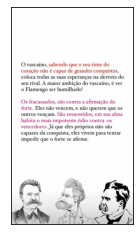

In [15]:
cv_show_image(image_path)

In [16]:
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

results = pytesseract.image_to_data(image_rgb, output_type=Output.DICT) 

Resutado do `tesseract`

In [17]:
# Deixar em uma frase
" ".join(results['text']).strip().replace('  ', ' ')

'O vascaino, sabendo que o seu time do cora¢4o nao é capaz de grandes conquistas, coloca todas as suas esperangas na derrota do seu rival. A maior ambic¢4o do vascaino, é ver o Flamengo ser humilhado!  Os fracassados, sao contra a afirmaga4o do forte. Eles nao vencem, e nao querem que os outros vengam. Sao ressentidos, em sua alma habita o mais impotente 6dio contra os vencedores. Ja que eles pr6prios nao sao capazes da conquista, eles vivem para tentar impedir que o forte se afirme.'

In [21]:
print(results["text"])

['', '', '', '', 'O', 'vascaino,', 'sabendo', 'que', 'o', 'seu', 'time', 'do', '', 'cora¢4o', 'nao', 'é', 'capaz', 'de', 'grandes', 'conquistas,', '', 'coloca', 'todas', 'as', 'suas', 'esperangas', 'na', 'derrota', 'do', '', 'seu', 'rival.', 'A', 'maior', 'ambic¢4o', 'do', 'vascaino,', 'é', 'ver', '', 'o', 'Flamengo', 'ser', 'humilhado!', '', '', '', 'Os', 'fracassados,', 'sao', 'contra', 'a', 'afirmaga4o', 'do', '', 'forte.', 'Eles', 'nao', 'vencem,', 'e', 'nao', 'querem', 'que', 'os', '', 'outros', 'vengam.', 'Sao', 'ressentidos,', 'em', 'sua', 'alma', '', 'habita', 'o', 'mais', 'impotente', '6dio', 'contra', 'os', '', 'vencedores.', 'Ja', 'que', 'eles', 'pr6prios', 'nao', 'sao', '', 'capazes', 'da', 'conquista,', 'eles', 'vivem', 'para', 'tentar', '', 'impedir', 'que', 'o', 'forte', 'se', 'afirme.', '', '', '', '']


O que o código a seguir faz:
+ Para cada palavra encontrada  irá fazer:
  - calcular as cordenadas (x,y,w,h)
  - encontrar seu texto e o seu conf
  - se o conf for > 0 (o que singifica que é mesmo uma palavra)
     - Vai pinrta a palavra, a confiança de que é mesmo uma palavra além de
      - 1. Desenhar um retnagulo emvolta dela
      - 2. Printar o nome dela emcima
      

  

In [19]:
for i in range(0, len(results["text"])): 
    
    # econtra valores do result para cada palavra
    x = results["left"][i] 
    y = results["top"][i] 
    w = results["width"][i] 
    h = results["height"][i] 
    text = results["text"][i] 
    conf = int(results["conf"][i]) 
      
    if conf > min_conf: 
        # printa a palavra encontrada
        print("Confidence: {}".format(conf),
             "Text: {}".format(text), '\n'
        ) 
        
        text = "".join(text).strip() 
        # coloca retangulo vermelho (0,0,255)
        cv2.rectangle(image,  (x, y), 
                      (x + w, y + h), 
                      (0, 0, 255), 2) 
        # coloca letra em amarelo
        cv2.putText(image, text, (x, y - 10),  
                    cv2.FONT_HERSHEY_SIMPLEX, 
                    1.1, (0, 255, 255), 1) 

Confidence: 93 Text: O 

Confidence: 92 Text: vascaino, 

Confidence: 92 Text: sabendo 

Confidence: 93 Text: que 

Confidence: 92 Text: o 

Confidence: 97 Text: seu 

Confidence: 96 Text: time 

Confidence: 96 Text: do 

Confidence: 4 Text: cora¢4o 

Confidence: 79 Text: nao 

Confidence: 88 Text: é 

Confidence: 91 Text: capaz 

Confidence: 96 Text: de 

Confidence: 93 Text: grandes 

Confidence: 92 Text: conquistas, 

Confidence: 91 Text: coloca 

Confidence: 96 Text: todas 

Confidence: 96 Text: as 

Confidence: 93 Text: suas 

Confidence: 53 Text: esperangas 

Confidence: 93 Text: na 

Confidence: 92 Text: derrota 

Confidence: 96 Text: do 

Confidence: 97 Text: seu 

Confidence: 93 Text: rival. 

Confidence: 96 Text: A 

Confidence: 93 Text: maior 

Confidence: 18 Text: ambic¢4o 

Confidence: 93 Text: do 

Confidence: 89 Text: vascaino, 

Confidence: 84 Text: é 

Confidence: 96 Text: ver 

Confidence: 92 Text: o 

Confidence: 96 Text: Flamengo 

Confidence: 93 Text: ser 

Confide

In [20]:
# Salvar imagem com os meteoros que caem na água 'verdes'
cv2.imwrite('example-storie-re.png', image)

True

In [13]:
# cv_open_image_on_windows(image)